In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from torchvision import models
import os

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
data_dir = '../data/'
test_dir = 'segmented_test'
classes = sorted(os.listdir(data_dir + test_dir))
batch_size = 64

In [9]:
"""
#normal test normalization
mean = [0.44947562, 0.46524084, 0.40037745]
std = [0.18456618, 0.16353698, 0.20014246]

data_transforms = {
        'test': transforms.Compose([
        transforms.ToTensor()])}

test_images = datasets.ImageFolder(os.path.join(data_dir, test_dir),
                    data_transforms['test'])

test_dataloader = DataLoader(test_images, batch_size=batch_size, shuffle=False, num_workers=4)
"""

"\n#normal test normalization\nmean = [0.44947562, 0.46524084, 0.40037745]\nstd = [0.18456618, 0.16353698, 0.20014246]\n\ndata_transforms = {\n        'test': transforms.Compose([\n        transforms.ToTensor()])}\n\ntest_images = datasets.ImageFolder(os.path.join(data_dir, test_dir),\n                    data_transforms['test'])\n\ntest_dataloader = DataLoader(test_images, batch_size=batch_size, shuffle=False, num_workers=4)\n"

In [10]:
model = models.alexnet()
model.classifier[6] = nn.Linear(4096, 10)
model.load_state_dict(torch.load('alexnet_pretrained.model', map_location=str(device)))
model.eval()
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_feature

In [11]:
def imshow(all_filters, num_cols, title=None):
    num_rows = 64
    fig = plt.figure(figsize=(num_rows, num_cols))
    i = 0
    for filters in all_filters:
        filters = np.asarray(filters)
        #filters = np.asarray(std).mean() * filters + np.asarray(mean).mean()
        filters = np.clip(filters, 0, 1)
        for kernel in filters:
            ax1 = fig.add_subplot(num_rows, num_cols, i+1)
            ax1.imshow(kernel, cmap='gray', interpolation='none')
            ax1.axis('off')
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
            i += 1
    plt.savefig('kernels.jpg', bbox_inches='tight')
    plt.pause(0.001)

In [12]:
"""with torch.no_grad():
    for data in test_dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        for layer in model.features:
            outputs = layer(inputs)
            inputs = outputs
            if isinstance(layer, nn.Conv2d):
                for i in range(len(outputs)):
                    imshow(outputs[i], outputs[i].size()[0])
                    break
                break
        break
"""

'with torch.no_grad():\n    for data in test_dataloader:\n        inputs, labels = data\n        inputs, labels = inputs.to(device), labels.to(device)\n        for layer in model.features:\n            outputs = layer(inputs)\n            inputs = outputs\n            if isinstance(layer, nn.Conv2d):\n                for i in range(len(outputs)):\n                    imshow(outputs[i], outputs[i].size()[0])\n                    break\n                break\n        break\n'

In [13]:
"""
def plot_kernels(tensor, num_cols):
    
    mean = 0.5
    std = 0.5
    maxVal = tensor.max()
    minVal = abs(tensor.min())
    maxVal = max(maxVal,minVal)
    tensor = tensor / maxVal
    tensor = tensor / 2
    tensor = tensor + 0.5
    
    #tensor = tensor * np.asarray(std).mean() + np.asarray(mean).mean()
    num_rows = 1
    fig = plt.figure(figsize=(num_cols, num_rows))
    i = 0
    for t in tensor:
        ax1 = fig.add_subplot(num_rows, num_cols, i+1)
        pilTrans = transforms.ToPILImage()
        pilImg = pilTrans(t)
        ax1.imshow(pilImg, interpolation='none')
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        i += 1
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()
    
for m in model.modules():
    if isinstance(m, nn.Conv2d):
        plot_kernels(m.weight.data, len(m.weight.data))
        break
"""

"\ndef plot_kernels(tensor, num_cols):\n    \n    mean = 0.5\n    std = 0.5\n    maxVal = tensor.max()\n    minVal = abs(tensor.min())\n    maxVal = max(maxVal,minVal)\n    tensor = tensor / maxVal\n    tensor = tensor / 2\n    tensor = tensor + 0.5\n    \n    #tensor = tensor * np.asarray(std).mean() + np.asarray(mean).mean()\n    num_rows = 1\n    fig = plt.figure(figsize=(num_cols, num_rows))\n    i = 0\n    for t in tensor:\n        ax1 = fig.add_subplot(num_rows, num_cols, i+1)\n        pilTrans = transforms.ToPILImage()\n        pilImg = pilTrans(t)\n        ax1.imshow(pilImg, interpolation='none')\n        ax1.axis('off')\n        ax1.set_xticklabels([])\n        ax1.set_yticklabels([])\n        i += 1\n    plt.subplots_adjust(wspace=0.1, hspace=0.1)\n    plt.show()\n    \nfor m in model.modules():\n    if isinstance(m, nn.Conv2d):\n        plot_kernels(m.weight.data, len(m.weight.data))\n        break\n"

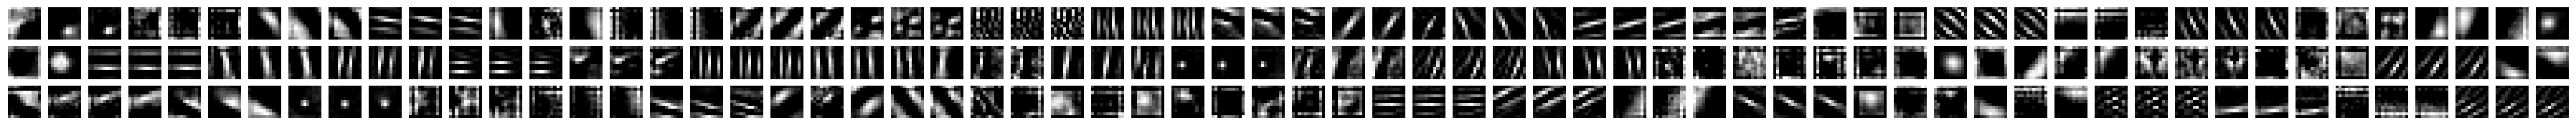

In [14]:
# plot filter by filter
for m in model.modules():
    if isinstance(m, nn.Conv2d):
        #for i in range(m.weight.shape[0]):
        imshow(m.weight.data, m.weight.shape[0])
        break